<a href="https://colab.research.google.com/github/oliyoung/oliyoung/blob/main/Assessment_2a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

## Upload data

In [71]:
from google.colab import drive 
drive.mount('/content/gdrive') 
%cd gdrive/ 
%cd MyDrive/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: 'gdrive/'
/content/gdrive/MyDrive
[Errno 2] No such file or directory: 'MyDrive/'
/content/gdrive/MyDrive


## Import Data & Create a DataFrame

In [72]:
import pandas as pd 
dataframe = pd.read_csv('Cellphone1.csv') 
dataframe.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


## Import Classifier Libraries from SciKit Learn

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

## Import Performance Analysis libraries

In [91]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve
from matplotlib import pyplot
import numpy as np

## Exclude dependent feature

In [75]:
input_features = dataframe.drop(['Churn'], axis=1)

# Prepare Data

## Summary Statistics

In [76]:
dataframe.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


## Display first 5 rows of input features 

In [77]:
input_features.head()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


## Describe the bounds of the input features

In [78]:
input_features.describe()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


## Display information about input features

In [79]:
input_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AccountWeeks     3333 non-null   int64  
 1   ContractRenewal  3333 non-null   int64  
 2   DataPlan         3333 non-null   int64  
 3   DataUsage        3333 non-null   float64
 4   CustServCalls    3333 non-null   int64  
 5   DayMins          3333 non-null   float64
 6   DayCalls         3333 non-null   int64  
 7   MonthlyCharge    3333 non-null   float64
 8   OverageFee       3333 non-null   float64
 9   RoamMins         3333 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 260.5 KB


## Examining dependent feature

In [80]:
dependent_feature = dataframe['Churn']
dependent_feature.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

## Calculating the summary statistics of output feature

In [81]:
dependent_feature.describe()

count    3333.000000
mean        0.144914
std         0.352067
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Churn, dtype: float64

# Prepare ML Experiments

## Preparing train and test data

In [82]:
X_train, X_test, y_train, y_test = train_test_split(input_features, dependent_feature, test_size=0.3)

# Evaluation

## Evaluation of RandomForest model

In [83]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: %0.2f" % accuracy )
print(classification_report(y_test,y_pred))

for feature, score in enumerate(model.feature_importances_):
	print('%s\t\t%.2f' % (dataframe.columns[feature],score))
 
true_negatives, false_positives, false_negatives, true_positives = confusion_matrix(y_test, y_pred).ravel()
print("False Negatives: %0.2f" % false_negatives)

Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       845
           1       0.93      0.66      0.77       155

    accuracy                           0.94      1000
   macro avg       0.93      0.83      0.87      1000
weighted avg       0.94      0.94      0.94      1000

Churn		0.06
AccountWeeks		0.06
ContractRenewal		0.03
DataPlan		0.06
DataUsage		0.14
CustServCalls		0.21
DayMins		0.07
DayCalls		0.15
MonthlyCharge		0.11
OverageFee		0.09
False Negatives: 52.00


## Evaluation of kNN (k Nearest Neighbours) Model 

In [84]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: %0.2f" % accuracy )
print(classification_report(y_test,y_pred))

true_negatives, false_positives, false_negatives, true_positives = confusion_matrix(y_test, y_pred).ravel()
print("False Negatives: %0.2f" % false_negatives)

Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       845
           1       0.71      0.29      0.41       155

    accuracy                           0.87      1000
   macro avg       0.80      0.63      0.67      1000
weighted avg       0.86      0.87      0.85      1000

False Negatives: 110.00


## Evaluation of Decision Tree Classifier

In [85]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: %0.2f" % accuracy )
print(classification_report(y_test,y_pred))

for feature, score in enumerate(model.feature_importances_):
	print('%s\t\t%.2f' % (dataframe.columns[feature],score))
 
true_negatives, false_positives, false_negatives, true_positives = confusion_matrix(y_test, y_pred).ravel()
print("False Negatives: %0.2f" % false_negatives)

Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       845
           1       0.62      0.64      0.63       155

    accuracy                           0.88      1000
   macro avg       0.78      0.78      0.78      1000
weighted avg       0.88      0.88      0.88      1000

Churn		0.05
AccountWeeks		0.07
ContractRenewal		0.01
DataPlan		0.07
DataUsage		0.11
CustServCalls		0.19
DayMins		0.09
DayCalls		0.17
MonthlyCharge		0.13
OverageFee		0.10
False Negatives: 56.00


## Evaluation of SVC Model

In [86]:
mode = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: %0.2f" % accuracy )
print(classification_report(y_test,y_pred))

for feature, score in enumerate(model.feature_importances_):
	print('%s\t\t%.2f' % (dataframe.columns[feature],score))
 
true_negatives, false_positives, false_negatives, true_positives = confusion_matrix(y_test, y_pred).ravel()
print("False Negatives: %0.2f" % false_negatives)

Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       845
           1       0.62      0.63      0.62       155

    accuracy                           0.88      1000
   macro avg       0.77      0.78      0.78      1000
weighted avg       0.88      0.88      0.88      1000

Churn		0.05
AccountWeeks		0.07
ContractRenewal		0.05
DataPlan		0.03
DataUsage		0.12
CustServCalls		0.20
DayMins		0.09
DayCalls		0.17
MonthlyCharge		0.13
OverageFee		0.10
False Negatives: 57.00


## Evaluation of Logistic Regression model

In [87]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: %0.2f" % accuracy )
print(classification_report(y_test,y_pred))

true_negatives, false_positives, false_negatives, true_positives = confusion_matrix(y_test, y_pred).ravel()
print("False Negatives: %0.2f" % false_negatives)

Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       845
           1       0.55      0.17      0.26       155

    accuracy                           0.85      1000
   macro avg       0.71      0.57      0.59      1000
weighted avg       0.82      0.85      0.82      1000

False Negatives: 128.00


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Evaluation of XGB Model

Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       845
           1       0.89      0.66      0.76       155

    accuracy                           0.94      1000
   macro avg       0.92      0.82      0.86      1000
weighted avg       0.93      0.94      0.93      1000

Churn		0.03
AccountWeeks		0.18
ContractRenewal		0.34
DataPlan		0.06
DataUsage		0.12
CustServCalls		0.08
DayMins		0.03
DayCalls		0.06
MonthlyCharge		0.05
OverageFee		0.04


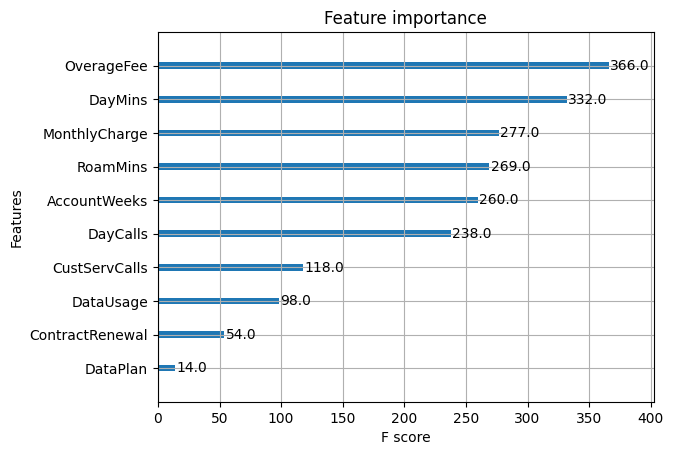

False Negatives: 53.00


array([[833,  12],
       [ 53, 102]])

In [94]:
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: %0.2f" % accuracy )
print(classification_report(y_test,y_pred))
for feature, score in enumerate(model.feature_importances_):
	print('%s\t\t%.2f' % (dataframe.columns[feature],score))


true_negatives, false_positives, false_negatives, true_positives = confusion_matrix(y_test, y_pred).ravel()
print("False Negatives: %0.2f" % false_negatives)
confusion_matrix(y_test, y_pred)


# Lost Revenue

In [89]:
mean_monthly_charge = input_features['MonthlyCharge'].mean()
mean_account_weeks = input_features['AccountWeeks'].mean()
mean_account_months = mean_account_weeks / 4
lost_revenue = (false_negatives * mean_monthly_charge) * mean_account_months

print("Lost Revenue: $%0.2f" % lost_revenue)

Lost Revenue: $75398.73


# Most Important Feature

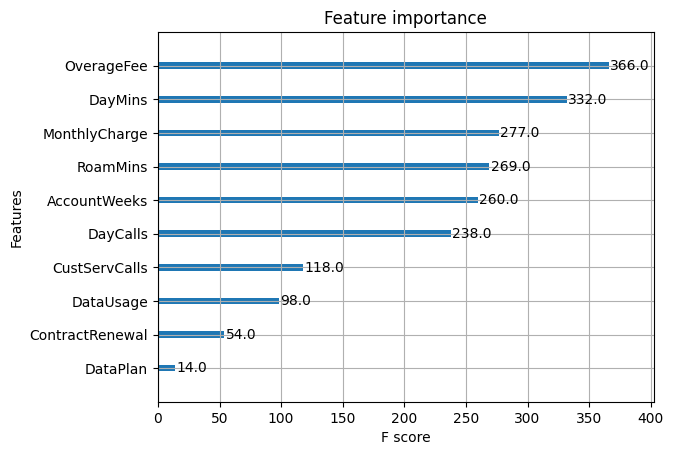

In [96]:
from xgboost import plot_importance

plot_importance(model)
pyplot.show()